Accuracy, Precision, Recall : Evaluating Classification Model
    ============

분류(Classification) 평가 지표 : Confusion matrix
    ------------

Confusion matrix :
 [[15  1  0]
 [ 0 21  0]
 [ 0  0  8]]


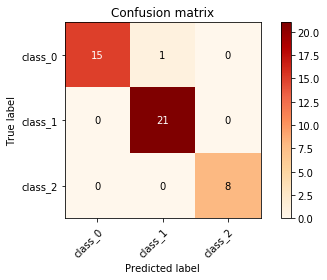

Normalized confusion matrix :
 [[0.94 0.06 0.  ]
 [0.   1.   0.  ]
 [0.   0.   1.  ]]


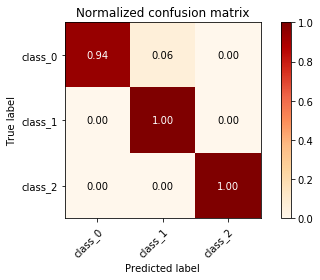

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def main():
    # Wine data set을 불러와서 X, y 데이터에 할당합니다.
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names

    # Training set과 test set으로 분리합니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # SVM linear kernel로 분류기를 생성하고 학습합니다.
    classifier = svm.SVC(kernel='linear', C=0.01)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    np.set_printoptions(precision=2)

    # confusion matrix를 시각화하여 출력합니다.
    ## 1. 아래 plot_confusion_matrix 함수의 인자를 참고하여 None을 채워보세요.
    plot_confusion_matrix(y_test, y_pred, classes=class_names)

    # 정규화 된 confusion matrix를 시각화하여 출력합니다.
    ## 2. 아래 plot_confusion_matrix 함수의 인자를 참고하여 None을 채워보세요.
    plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True)


# Confusion matrix 시각화
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.OrRd):
                          
    title = ""
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix'

    ## 3. Confusion matrix에 실제 값과 예측 값을 인자로 입력하세요.
    cm = confusion_matrix(y_true, y_pred)

    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        # 정규화 할 때는 모든 값을 더해서 합이 1이 되도록 각 데이터를 스케일링 합니다.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(title, ":\n", cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # label을 45도 회전해서 보여주도록 변경
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # confusion matrix 실제 값 뿌리기
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    plt.savefig('pictures/confusion matrix.png')
    plt.show()


if __name__ == "__main__":
    main()

분류(Classification) 평가 지표 : 정확도(accuracy), 정밀도(precision), 재현율(recall)
    ----------------------

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd

def main():
    # 실제 값
    y_true = pd.Series(
        ["not mafia", "not mafia", "mafia", "not mafia", "mafia", 
        "not mafia", "not mafia", "mafia", "not mafia", "not mafia"]
        )
    # 예측된 값
    y_pred = pd.Series(
        ["mafia", "mafia", "not mafia", "not mafia", "mafia", 
        "not mafia", "not mafia", "mafia", "not mafia", "not mafia"]
        )
    
    print("1. Confusion Matrix :\n",pd.crosstab(y_pred, y_true, rownames=['Predicted'], colnames=['Actual'], margins=True))
    
    
    # 1. '실행 버튼을 클릭 해, 마피아(mafia)와 시민(not mafia)으로 분류 된 confusion matrix를 확인 해 보세요.
    cm = confusion_matrix(y_true, y_pred)
    
    # 2. 실행시킨 값을 토대로 마피아를 제대로 분석했는 지에 대한 recall, precision, accuracy를 구해 보세요.
    # 숫자 0을 지우고 직접 공식에 대입해 각각 값을 입력해 보세요.
    accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    precision = cm[0][0] / (cm[0][0] + cm[1][0])
    recall = cm[0][0] / (cm[0][0] + cm[0][1])
    
    accuracy = 7/10
    
    precision = 2/4
    
    recall = 2/3
    
    
    # 3. 실제 정답과 비교해 보세요.
    print("\n\n3. Result :")
    if accuracy == accuracy_score(y_true, y_pred) :
        print("accuracy : %.2f 으로, 정확히 일치합니다." % (accuracy_score(y_true, y_pred)))
    else :
        print("accuracy 가 일치하지 않습니다. 값을 확인해 주세요!")
        
    if precision == precision_score(y_true, y_pred, average=None)[0] :
        print("precision : %.2f 으로, 정확히 일치합니다." % (precision_score(y_true, y_pred, average=None)[0]))
    else :
        print("precision 이 일치하지 않습니다. 값을 확인해 주세요!")
        
    if recall == recall_score(y_true, y_pred, average=None)[0] :
        print("recall : %.2f 으로, 정확히 일치합니다." % (recall_score(y_true, y_pred, average=None)[0]))
    else :
        print("recall 이 일치하지 않습니다. 값을 확인해 주세요!")
        
    # 4. 주석을 풀고, classification report를 확인해보세요.
    print("\n\n4. Classification report : \n", classification_report(y_true, y_pred))


if __name__ == "__main__":
    main()

1. Confusion Matrix :
 Actual     mafia  not mafia  All
Predicted                       
mafia          2          2    4
not mafia      1          5    6
All            3          7   10


3. Result :
accuracy : 0.70 으로, 정확히 일치합니다.
precision : 0.50 으로, 정확히 일치합니다.
recall : 0.67 으로, 정확히 일치합니다.


4. Classification report : 
               precision    recall  f1-score   support

       mafia       0.50      0.67      0.57         3
   not mafia       0.83      0.71      0.77         7

   micro avg       0.70      0.70      0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10



분류(Classification) 평가 지표 : AUC - ROC Curve
    -----------------

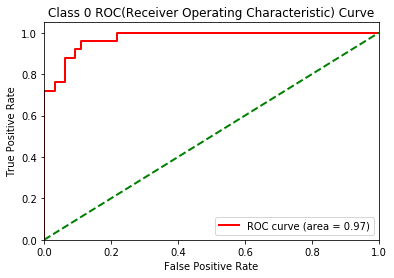

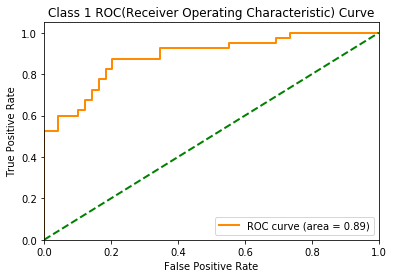

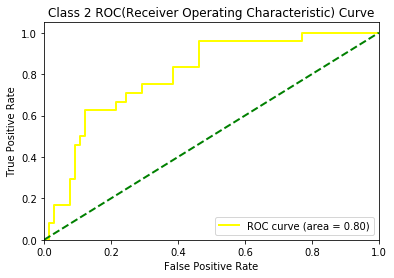

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def main():
    # 와인 데이터를 불러옵니다.
    wine = datasets.load_wine()
    # X와 Y 데이터를 나눕니다.
    X = wine.data
    y = wine.target

    # class를 숫자로 변환시켜줍니다.
    y = label_binarize(y, classes=[0, 1, 2])
    
    ## 1. y에 해당하는 클래스가 몇 개인지 확인해보세요.
    n_classes = y.shape[1]

    # 약간의 noise를 넣어서 문제를 좀 더 변동성 있게 만듭니다.
    random_state = np.random.RandomState(0)
    n_samples, n_features = X.shape
    X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

    # Training / test data를 나눠줍니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

    # SVM을 활용하여 모델링 및 학습을 진행 합니다.
    random_state = np.random.RandomState(0)
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    # 각 클래스의 ROC Curve 값을 계산하여 넣어 줄 변수를 선언합니다.
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # ROC curve를 사용하여 분류 성능을 확인해 봅시다.
    for i in range(n_classes):
        ## 2. roc_curve() 함수에 y_test의 i번째 열, y_score의 i번째 열을 입력 인자로 넣어 fpr[i], tpr[i]의 값을 획득하세요.
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])

        ## 3. auc() 함수에 fpr[i], tpr[i]를 입력 인자로 넣어 각각의 클래스에서의 ROC & AUC 값을 획득하세요.
        roc_auc[i] = auc(fpr[i], tpr[i])

    for nth_class in range(n_classes):
        plot_ROC_curve(fpr, tpr, roc_auc, nth_class)
    
    
# ROC curve를 그리기 위해 사용되는 함수입니다.
def plot_ROC_curve(fpr, tpr, roc_auc, nth_class):

    plt.figure()
    lw = 2
    
    color_name = ''
    if nth_class == 0:
        color_name = 'red'
    elif nth_class == 1 :
        color_name = 'darkorange'
    else :
        color_name = 'yellow'
        
    plt.plot(fpr[nth_class], tpr[nth_class], color=color_name,
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nth_class])
    plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %s ROC(Receiver Operating Characteristic) Curve' %nth_class)
    plt.legend(loc="lower right")
    plt.savefig('pictures/roc curve.png')

if __name__ == "__main__":
    main()

분류(Classification) 평가 지표
-------------

In [5]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

def main():
	
    ## y_true, y_pred를 다음과 같이 정의합니다.
    y_true = ["apple", "banana", "cherry", "grape", "banana", "banana", "apple", "grape"]
    y_pred = ["grape", "banana", "cherry", "grape", "cherry", "grape", "apple", "grape"]
    
    # 1. average 값을 다르게 설정하여 f1 score를 출력해 보세요.
    f1_score_macro = f1_score(y_true, y_pred, average = 'macro')
    f1_score_micro = f1_score(y_true, y_pred, average = 'micro')
    f1_score_weighted = f1_score(y_true, y_pred, average = 'weighted')
    f1_score_None = f1_score(y_true, y_pred, average = None)
    
    print("F1_Score_macro = ", f1_score_macro)
    print("F1_Score_micro = ", f1_score_micro)
    print("F1_Score_weighted = ", f1_score_weighted)
    print("F1_Score_None = ", f1_score_None)
    
    ## Wine data에서 SVM을 통해 학습시킨 y_true, y_pred 값을 받아옵니다.
    y_true2, y_pred2 = get_data_for_F1_Score()
    
    # 2. average 값을 다르게 설정하여 f1 score를 출력해 보세요.
    f1_score_macro2 = f1_score(y_true2, y_pred2, average = 'macro')
    f1_score_micro2 = f1_score(y_true2, y_pred2, average = 'micro')
    f1_score_weighted2 = f1_score(y_true2, y_pred2, average = 'weighted')
    f1_score_None2 = f1_score(y_true2, y_pred2, average = None)
    
    print("\nF1_Score_macro2 = ", f1_score_macro2)
    print("F1_Score_micro2 = ", f1_score_micro2)
    print("F1_Score_weighted2 = ", f1_score_weighted2)
    print("F1_Score_None2 = ", f1_score_None2)
    
    
def get_data_for_F1_Score():
    # Wine data set을 불러와서 X, y 데이터에 할당합니다.
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names

    # Training set과 test set으로 분리합니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # SVM linear kernel로 분류기를 생성하고 학습합니다.
    classifier = svm.SVC(kernel='linear', C=0.01)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    np.set_printoptions(precision=2)
    
    return y_test, y_pred


if __name__ == "__main__":
    main()

F1_Score_macro =  0.6249999999999999
F1_Score_micro =  0.625
F1_Score_weighted =  0.6041666666666666
F1_Score_None =  [0.67 0.5  0.67 0.67]

F1_Score_macro2 =  0.9814953738434609
F1_Score_micro2 =  0.9777777777777777
F1_Score_weighted2 =  0.9776777527715261
F1_Score_None2 =  [0.97 0.98 1.  ]


PR Curve
--------

f1=0.836 auc=0.892 ap=0.840


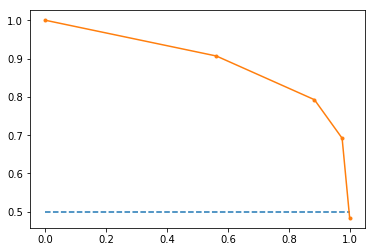

In [2]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from matplotlib import pyplot as plt

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(testX)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(testy, probs)
# calculate F1 score
f1 = f1_score(testy, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(testy, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

ROC Curve
------------

AUC: 0.895


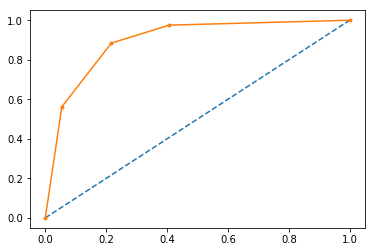

<Figure size 432x288 with 0 Axes>

In [3]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)
# predict probabilities
probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(testy, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

pyplot.savefig('pictures/roc.png')

Confusion Matrix
-----

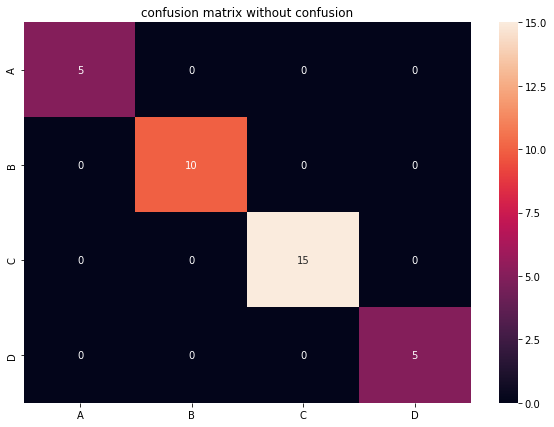

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

########################################
array = [[5,0,0,0],  # when input was A, prediction was all A
         [0,10,0,0], # when input was B, prediction was all A
         [0,0,15,0], # when input was C, prediction was all A
         [0,0,0,5]]  # when input was D, prediction was all A
df_cm = pd.DataFrame(array, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (10,7))
plt.title('confusion matrix without confusion')
sns.heatmap(df_cm, annot=True)
plt.savefig('pictures/confusion_matrix')